In [2]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from datetime import datetime

In [3]:
df = pd.read_csv("data.csv")


To get an overall sense of the data, we can use a head function (for the first 5 variables), list the different columns and print the various
countries involved in the data:


In [5]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [6]:
list(df.columns)

['Id',
 'Province_State',
 'Country_Region',
 'Date',
 'ConfirmedCases',
 'Fatalities']

In [7]:
print(list(df.Country_Region.unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', '


We can now use a query to get a look of the data for Denmark only:


In [9]:
df.query("Country_Region == 'Denmark'")

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
6370,9101,Faroe Islands,Denmark,2020-01-22,0.0,0.0
6371,9102,Faroe Islands,Denmark,2020-01-23,0.0,0.0
6372,9103,Faroe Islands,Denmark,2020-01-24,0.0,0.0
6373,9104,Faroe Islands,Denmark,2020-01-25,0.0,0.0
6374,9105,Faroe Islands,Denmark,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
6575,9366,NaN,Denmark,2020-03-27,2046.0,52.0
6576,9367,NaN,Denmark,2020-03-28,2201.0,65.0
6577,9368,NaN,Denmark,2020-03-29,2395.0,72.0
6578,9369,NaN,Denmark,2020-03-30,2577.0,77.0


In [10]:
### Data Cleaning, Structuring, and Feature Engineering


A quick query within the region of Denmark will show the provinces in Denmark:


In [12]:
df.query("Country_Region == 'Denmark'").Province_State.unique()

array(['Faroe Islands', 'Greenland', nan], dtype=object)


We now limit the dataset to the Kingdom of Denmark only and add two more variables; the daily cases and fatalities using the day-to-day difference
in the total number.
We then fill in the blanks when the province is not neither the Faroe Islands nor Greenland to "Denmark" using a "fillna"-function:


In [14]:
dk = df[(df.Country_Region == 'Denmark')]

dk["NewCases"] = dk.groupby(["Country_Region"]).ConfirmedCases.diff(1)
dk["NewFatalities"] = dk.groupby(["Country_Region"]).Fatalities.diff(1)
dk.index = pd.to_datetime(dk.Date)

dk['Province_State'].fillna('Denmark', inplace=True)

dk

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,NewCases,NewFatalities
Date,,,,,,,,
2020-01-22,9101,Faroe Islands,Denmark,2020-01-22,0.0,0.0,NaN,NaN
2020-01-23,9102,Faroe Islands,Denmark,2020-01-23,0.0,0.0,0.0,0.0
2020-01-24,9103,Faroe Islands,Denmark,2020-01-24,0.0,0.0,0.0,0.0
2020-01-25,9104,Faroe Islands,Denmark,2020-01-25,0.0,0.0,0.0,0.0
2020-01-26,9105,Faroe Islands,Denmark,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2020-03-27,9366,Denmark,Denmark,2020-03-27,2046.0,52.0,169.0,11.0
2020-03-28,9367,Denmark,Denmark,2020-03-28,2201.0,65.0,155.0,13.0
2020-03-29,9368,Denmark,Denmark,2020-03-29,2395.0,72.0,194.0,7.0


In [15]:
dk.describe()

,Id,ConfirmedCases,Fatalities,NewCases,NewFatalities
count,210.00000,210.000000,210.000000,209.000000,209.000000
mean,9235.50000,155.842857,2.580952,13.684211,0.430622
std,84.31351,479.657064,11.917002,45.659650,1.918087
min,9101.00000,0.000000,0.000000,-169.000000,0.000000
25%,9153.25000,0.000000,0.000000,0.000000,0.000000
50%,9235.50000,0.000000,0.000000,0.000000,0.000000
75%,9317.75000,6.000000,0.000000,1.000000,0.000000
max,9370.00000,2860.000000,90.000000,283.000000,13.000000



The describe function tells us some simple descriptions of our dataset. we have 210 datapoints, and 209 for new cases and new fatalities as we need 1 to subtract.
The means are skewed because many of the datapoints in the early periods are 0, as the virus hadn't yet entered Denmark here. Keeping this in mind, the average daily increase in cases and fatalities are 13.68 and 0.43 respectively.
The quartiles shows, what was previously stated, that in most of the dataset there aren't any cases of Covid-19 in Denmark.

The maximum shows the amount of confirmed cases and fatalities at the end point in our dataset for the variables "ConfirmedCases" and "Fatalities". For "NewCases" and "NewFatalities" it shows the highest single day increase in cases and fatalities respectively, these are shown in the query below.


In [17]:
dk.query('NewCases==283.000000')
dk.query('NewFatalities==13.000000')

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,NewCases,NewFatalities
Date,,,,,,,,
2020-03-28,9367,Denmark,Denmark,2020-03-28,2201.0,65.0,155.0,13.0
2020-03-31,9370,Denmark,Denmark,2020-03-31,2860.0,90.0,283.0,13.0


In [18]:
### Vizualization

It is noticed that there are many days with zero cases. Therefore, to get a better visual understanding, we limit the confirmed cases to positive
only.
Then we construct two widgets; one for the day-to-day number and one for the total number of cases. The widgets will be limited to the different
provinces in Denmark (earlier listed).
At the end, they will also be graphed:

In [20]:
dk_plot = dk[(dk.ConfirmedCases > 0)]

def plot_cov(data, province):
    I = dk_plot['Province_State'] == province
    
    ax=dk_plot.loc[I,:].plot(x='Date', y='NewCases', label="New Cases", color="blue", title="New Cases", figsize=(10, 6))
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_ylabel("New Cases", color='blue')
    ax2 = ax.twinx()
    ax2=dk_plot.loc[I,:].plot(x='Date', y='NewFatalities', label="New Fatalities", color="red", ax=ax2)
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylabel("New Fatalities", color='red')

def plot_cov2(data, province):
    I = dk_plot['Province_State'] == province
    
    ax=dk_plot.loc[I,:].plot(x='Date', y='ConfirmedCases', label="Accumulated Cases", color="blue", title="Accumulated Cases", figsize=(10, 6))
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_ylabel("Accumulated Cases", color='blue')
    ax2 = ax.twinx()
    ax2=dk_plot.loc[I,:].plot(x='Date', y='Fatalities', label="Accumulated Fatalities", color="red", ax=ax2)
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylabel("Accumulated Fatalities", color='red')

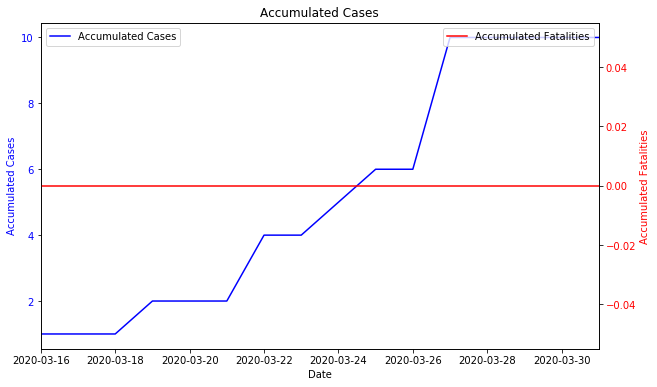

In [21]:
widgets.interact(plot_cov,
    data = widgets.fixed(dk_plot),
    province = widgets.Dropdown(description='Province',
                                      options=dk_plot.Province_State.unique(),
                                      value='Greenland')
);

widgets.interact(plot_cov2,
    data = widgets.fixed(dk_plot),
    province = widgets.Dropdown(description='Province',
                                      options=dk_plot.Province_State.unique(),
                                      value='Greenland')
);

In [22]:
### Conclusion


To conclude on the graphs from the different areas in the Kingdom of Denmark, there are still no confirmed fatalities on neither Greenland
nor the Faroe Islands. Regarding the fatalities on in the country of Denmark, it can be seen that the number varies a great deal on a day-to-day
basis, whereas the total number of cases will reach 3000 before long.
